In [18]:
# libraries

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.api import OLS

from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from pandas.plotting import scatter_matrix

import seaborn as sns
from datetime import datetime

import gensim
import spacy
from gensim.models import Word2Vec as w2v
import re
import nltk

%matplotlib inline

In [19]:
df = pd.read_csv("tweets.csv", index_col=0)

df.shape

(145094, 24)

In [20]:
df.columns

Index(['text', 'source', 'user_id', 'truncated', 'in_reply_to_status_id',
       'in_reply_to_user_id', 'in_reply_to_screen_name', 'retweeted_status_id',
       'geo', 'place', 'contributors', 'retweet_count', 'reply_count',
       'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive',
       'num_hashtags', 'num_urls', 'num_mentions', 'created_at', 'timestamp',
       'crawled_at', 'updated'],
      dtype='object')

In [21]:
columns = ['source', 'truncated', 'place', 'contributors']
df = df.drop(columns, axis=1)

In [22]:
cols2 = ['geo', 'retweeted', 'possibly_sensitive']
df = df.drop(cols2, axis=1)

In [23]:
cols3 = ['created_at', 'crawled_at', 'updated']
df = df.drop(cols3, axis=1)

In [24]:
df.head()

,text,user_id,in_reply_to_status_id,in_reply_to_user_id,in_reply_to_screen_name,retweeted_status_id,retweet_count,reply_count,favorite_count,favorited,num_hashtags,num_urls,num_mentions,timestamp
id,,,,,,,,,,,,,,
22642586115,CPPRI Recruitment 2010 at http://ping.fm/yp8zH,7248952,0,0,NaN,0,0,0,0,NaN,0,1,0,2010-08-31 21:24:14
22642583483,National Games Secretariat Recruitment 2010 :...,7248952,0,0,NaN,0,0,0,0,NaN,0,1,0,2010-08-31 21:24:11
22642524678,CIPET Recruitment Jobs at http://ping.fm/KnFCa,7248952,0,0,NaN,0,0,0,0,NaN,0,1,0,2010-08-31 21:23:12
22642504361,DIAT Recruitment 2010 at http://ping.fm/huS9m,7248952,0,0,NaN,0,0,0,0,NaN,0,1,0,2010-08-31 21:22:51
22642475789,BHEL Recruitment 2010 : http://ping.fm/PLWWA,7248952,0,0,NaN,0,0,0,0,NaN,0,1,0,2010-08-31 21:22:23


In [25]:
# got rid of index because we don't need tweet IDs

df.reset_index(drop = True, inplace = True)

In [26]:
df.sort_values('user_id')

,text,user_id,in_reply_to_status_id,in_reply_to_user_id,in_reply_to_screen_name,retweeted_status_id,retweet_count,reply_count,favorite_count,favorited,num_hashtags,num_urls,num_mentions,timestamp
0,CPPRI Recruitment 2010 at http://ping.fm/yp8zH,7248952,0,0,NaN,0,0,0,0,NaN,0,1,0,2010-08-31 21:24:14
844,Are Climate Change Deniers Guilty of Treason?:...,7248952,0,0,NaN,0,0,0,0,NaN,0,1,0,2009-07-13 08:09:14
843,Wildlife Fishing Provides You Free Summer Fun ...,7248952,0,0,NaN,0,0,0,0,NaN,0,1,0,2009-07-13 15:01:52
842,Wildlife Fishing Provides You Free Summer Fun ...,7248952,0,0,NaN,0,0,0,0,NaN,0,1,0,2009-07-13 15:02:35
841,"Hurricanes: Hurricanes are giant, spiraling tr...",7248952,0,0,NaN,0,0,0,0,NaN,0,1,0,2009-07-14 09:12:25
840,Hurricane Warning: In Hot Water: Last year was...,7248952,0,0,NaN,0,0,0,0,NaN,0,1,0,2009-07-14 09:12:30
839,Hurricane Warning: In Hot Water http://ping.fm...,7248952,0,0,NaN,0,0,0,0,NaN,0,1,0,2009-07-14 12:14:51
838,Study: Katrina Hurricane Will be Increase in 2...,7248952,0,0,NaN,0,0,0,0,NaN,0,1,0,2009-07-14 12:15:54
837,Study: Katrina Hurricane Will be Increase in 2...,7248952,0,0,NaN,0,0,0,0,NaN,0,1,0,2009-07-14 12:18:48
836,Hurricane Warning: In Hot Water http://bit.ly/...,7248952,0,0,NaN,0,0,0,0,NaN,0,1,0,2009-07-14 12:19:13


In [27]:
# insatlled NLTK database

nltk.download()
from collections import Counter

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [28]:
df['tokenized_text'] = df['text'].apply(nltk.word_tokenize)

df['tokenized_text']

0         [CPPRI, Recruitment, 2010, at, http, :, //ping...
1         [National, Games, Secretariat, Recruitment, 20...
2         [CIPET, Recruitment, Jobs, at, http, :, //ping...
3         [DIAT, Recruitment, 2010, at, http, :, //ping....
4         [BHEL, Recruitment, 2010, :, http, :, //ping.f...
5         [NIRD, Recruitment, 2010, at, http, :, //ping....
6         [JSAC, Jobs, 2010, Of, Meteorologist, ,, Techn...
7         [Mazagon, Dock, Limited, (, MDL, ), Recruitmen...
8         [Innovative, DIY, Picture, Frame, Ideas, For, ...
9         [Chaudhary, Devi, Lal, University, (, CDLU, ),...
10        [Visvesvaraya, Technological, University, (, V...
11        [Madras, University, PG, Degree, Instant, &, R...
12        [Union, Public, Service, Commission, (, UPSC, ...
13        [UPSC, CDS, II, Final, Results, for, Men, &, W...
14        [Kota, University, BSc, (, Bio-Chem, ), Part, ...
15        [Latest, Admissions, News, At, http, :, //ping...
16        [Latest, examination, updates,

In [29]:
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer()

In [30]:
top_N = 20
a = df['text'].str.cat(sep=' ')
words = tknzr.tokenize(a)
word_dist = nltk.FreqDist(words)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])

# https://stackoverflow.com/questions/48630248/word-tokenize-twitter-data
# https://stackoverflow.com/questions/46786211/counting-the-frequency-of-words-in-a-pandas-data-frame

In [31]:
print(rslt)

         Word  Frequency
0           \     237311
1           ,      46554
2           .      34846
3           :      34843
4           !      34823
5           -      27783
6           ?      22976
7          to      22375
8           a      20787
9         ...      17084
10        the      16531
11         de      13846
12         of      12365
13          "      12344
14        you      11207
15        and      11161
16      u0e23      10745
17          *      10142
18  followers      10012
19          o       9952


In [32]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

top_N = 20
a = df['text'].str.cat(sep=' ')
words = tokenizer.tokenize(a)
word_dist = nltk.FreqDist(words)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])

# https://stackoverflow.com/questions/15547409/how-to-get-rid-of-punctuation-using-nltk-tokenizer

In [33]:
print(rslt)

         Word  Frequency
0        http      88197
1          ly      41416
2         bit      37803
3         com      26267
4          to      22657
5           a      20978
6         the      16888
7          me      15101
8          de      13935
9          of      12410
10         is      12075
11        you      11603
12        and      11213
13      u0e23      10745
14        for      10141
15  followers      10131
16          o      10026
17        www      10010
18      u0e32       9768
19      u0e19       8987


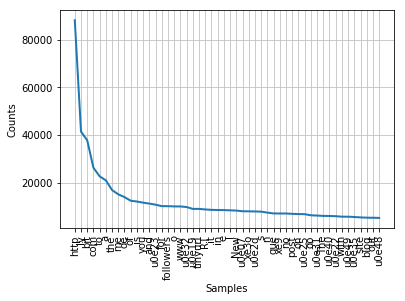

In [34]:
fd = nltk.FreqDist(words)
fd.plot(50,cumulative=False) 

In [35]:
from nltk.corpus import stopwords

set(stopwords.words('english'))

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r